In [2]:
#EDA
import pandas as pd
 # used for loading and understanding data (uses Numpy behind the scenes)
import seaborn as sns
# for statistical visualization (advanced plotting)
import matplotlib.pyplot as plt
# used for visualization of data through pictures and graphs
import missingno as msno
# used for visualizing missing data through graphs



In [3]:

# load datas
# df = pd.read_csv('MovieDatas.csv') this shows error as file contains special charactuer and this line uses the utf-8  default encoding to read csv 
df = pd.read_csv('MovieDatas.csv', encoding='ISO-8859-1')  # using ISO-8859-1 encoding to handle special characters
import os
print(os.getcwd())  # prints the current working directory to ensure the file path is correct

c:\Users\ACER\OneDrive\Desktop\Task2\Task2-MovieRatingPrediction


In [ ]:

# shape of the datasets gives the tuple of dimensions
print("shape of the dataset is=", df.shape)

# basic information about the dataset
print(df.info())

# for statistics inforamtion about the dataset
print(df.describe()) # focuses on only 1 numeric column 
'''
 to include all columns including text and categoric i.e. no  numeric we do:
 df.describe(include='all')
'''
# to get the correlation matrix i.e. relationship between the numeric columns
print(df.corr())



In [ ]:

# displaying datas using various methods
df.head()  # first 5 rows of the dataframe df which is loaded with datas from csv
df.tail()  #  last 5 rows of the dataframe
df.sample(5)  # 5 random rows from the dataframe df
'''
pd.set_option('display.max_rows',None)

this helps to control the rows which we want to display
setting none means it has no limit as it will show all rows without ...
we can reset it back to default after using

display(df)  # displays in HTML format 
pd.reset_option('display.max_rows')  

'''

In [ ]:
# missing datas
print("Missing values in the datasets are: ")
print(df.isnull()) # this gives the dataframe of the same shape with the boolean values 
print(df.isnull().sum())  # this gives the count of missing values in each column
print(df.isnull().sum(axis=1))  # this gives the count of missing values in each row

'''
isnull checks each cell both the rows and column and give the dataframe 
isnull().sum() checks and then count the missing values in each columns and five counts 

'''



In [ ]:
# visualization of the datas i.e. missing ones
print("misssing data matrix")
msno.matrix(df)  
'''
matrix(df) creates a data matrix plot  
dark =  not missing values
light =  missing values
donot suppport the customaization through inbuilt

'''
plt.show()

print(" heat maps of the missing data")
msno.heatmap(df) # seaborn heatmap
plt.show()
'''
this shoes the correlation between the missing values in the dataset of different columns
value 1 high relation and 0 low relation
'''
print("dendrogram")
msno.dendrogram(df)
plt.show()
'''
this is the tree like structure to show hierarchial clustering
'''
print("bar chart")
msno.bar(df,color='red')
plt.show()


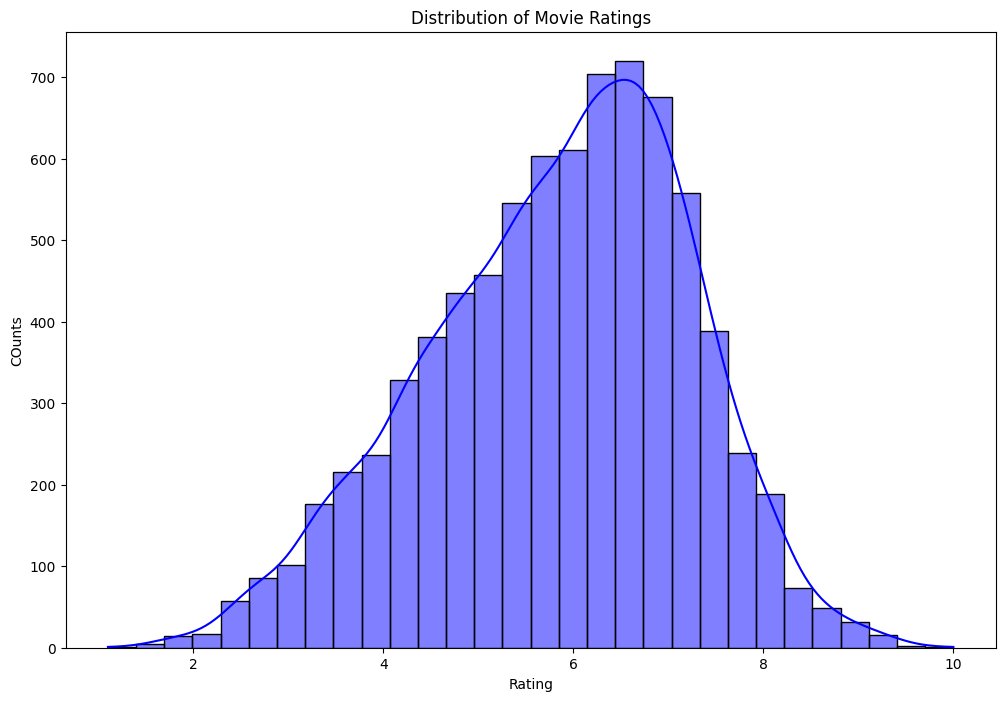

In [8]:
# explore the numeric data distribution
# visualizing target i.e. rating column before modelling
if 'Rating' in df.columns: # rating is case sensitive
    plt.figure(figsize=(12,8)) # 12 width and 8 height inches tall canvas
    sns.histplot(df['Rating'].dropna(), kde=True, bins=30, color='blue')  
    '''
    hisplot is used to plot histogram (bar chart of how often different ratings appear in data)
    .dropna() remove missing values
    kde=True this is used to show where more datas are crowded or are less crowded.

    '''
    plt.title('Distribution of Movie Ratings')
    plt.xlabel('Rating')
    plt.ylabel('COunts')
    plt.show()



In [ ]:
# correlation heatmap of numeric columns for reducing mutlicollinearity and help in feature selection
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
if len(numeric_cols)>1:
    plt.figure(figsize=(10,8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    '''
    annot= true means we will see the actual number of correlation in the cell
    cmap is the color map in heatmap where different color has different value of correlation
    fmt means format the numbers inside each cell .2f i.e. 2 decimal place
    '''
    plt.title("Corelation heatmap of the numeric columns / features")
    plt.show()
    '''
    this doesnot show plot because the condition is not satisfied as only 1 numeric is present 
    all others are not purely numeric they are stings and pandas only select the pure one so
    '''

C:\Users\ACER\AppData\Local\Temp\ipykernel_15416\2037402222.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genreCounts.index, y=genreCounts.values, palette='viridis')


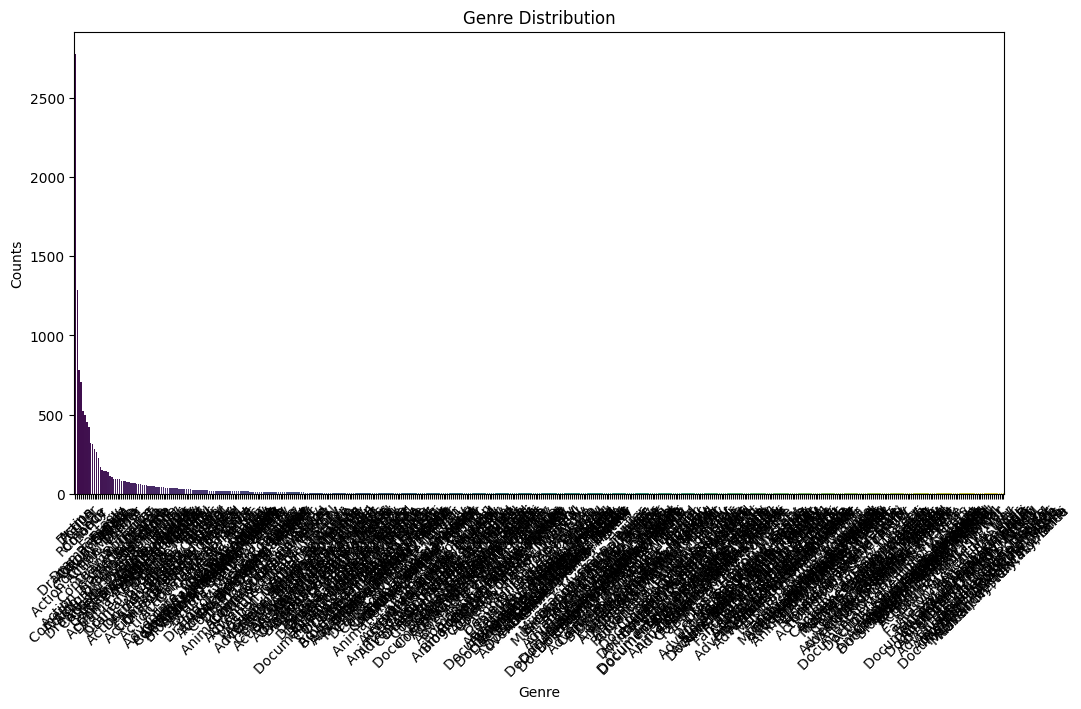

In [11]:
# visualization of catergorial data to indentify the dominant one and to see if there is any bias in decision
# eg. genre visualization

if 'Genre'in df.columns:
    plt.figure(figsize=(12,6))
    genreCounts=df['Genre'].value_counts() # gives counts of unique values in the column
    sns.barplot(x=genreCounts.index, y=genreCounts.values, palette='viridis')
    plt.title('Genre Distribution')
    plt.xlabel('Genre')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()